<a href="https://colab.research.google.com/github/nirupamgpta/Assignments/blob/main/Boston_Housing_L3_P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

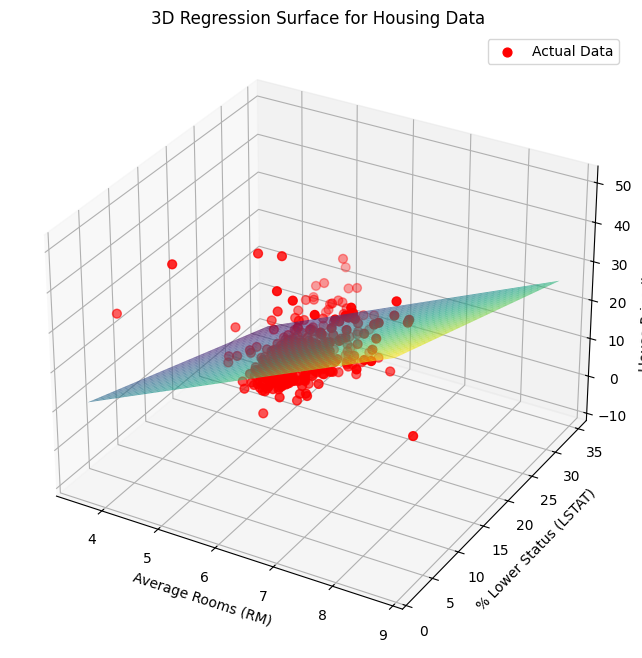

In [ ]:
#Linear regression two features RM & LSTAT
# Install dependencies if needed
!pip install scikit-learn matplotlib

# --- Imports ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# --- Load Dataset ---
# Load data from a CSV file on your device
# You will need to upload the CSV file to your Colab environment first.
# Replace 'your_dataset.csv' with the actual name of your file.
try:
    df = pd.read_csv('your_dataset.csv')
    # Assuming your CSV has columns named 'RM', 'LSTAT', and 'target'
    # Drop rows with any NaN values in the relevant columns
    df.dropna(subset=['RM', 'LSTAT', 'target'], inplace=True)

    X = df[['RM', 'LSTAT']].values
    y = df['target'].values
    dataset_loaded = True
except FileNotFoundError:
    print("Error: 'your_dataset.csv' not found. Please upload your CSV file.")
    dataset_loaded = False


# Check if the dataset was loaded successfully before proceeding
if dataset_loaded:
    # Pick 2 features for 3D visualization (e.g., RM = avg rooms, LSTAT = % lower status)
    # The features are now directly taken from the loaded CSV columns 'RM' and 'LSTAT'
    X_vis = X

    # --- Train Model ---
    model = LinearRegression()
    model.fit(X_vis, y)

    # --- Create Grid for Surface ---
    x_surf = np.linspace(X_vis[:,0].min(), X_vis[:,0].max(), 50)
    y_surf = np.linspace(X_vis[:,1].min(), X_vis[:,1].max(), 50)
    x_surf, y_surf = np.meshgrid(x_surf, y_surf)
    z_surf = model.predict(np.c_[x_surf.ravel(), y_surf.ravel()])
    z_surf = z_surf.reshape(x_surf.shape)

    # --- Plotting ---
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    ax.plot_surface(x_surf, y_surf, z_surf, cmap='viridis', alpha=0.7)

    # Plot the actual data points
    ax.scatter(X_vis[:,0], X_vis[:,1], y, color='red', s=40, label="Actual Data")

    # Labels
    ax.set_xlabel('Average Rooms (RM)')
    ax.set_ylabel('% Lower Status (LSTAT)')
    ax.set_zlabel('House Price (in $1000s)')
    ax.set_title('3D Regression Surface for Housing Data')

    ax.legend()
    plt.show()
else:
    print("Dataset not loaded. Cannot proceed with model training and plotting.")